# ⚙️ Implementasi Aplikasi Analisis Laporan Penjualan dengan Pandas dan Matplotlib di Python

Berikut adalah skrip Python yang mengotomatisasi analisis laporan penjualan:

* **Mengimpor Modul:** Mengimpor `pandas` untuk manipulasi data dan `matplotlib.pyplot` untuk visualisasi.
* **Fungsi `load_data(file_path)`:** Memuat data penjualan dari file CSV menggunakan `pd.read_csv()` dan menangani potensi error saat pemuatan file.
* **Fungsi `clean_data(data)`:** Menerima DataFrame Pandas sebagai input dan melakukan pembersihan dan prapemrosesan:
    * Mengisi nilai kosong pada kolom 'Product_Category' dengan "Unknown".
    * Menghapus baris yang mengandung nilai kosong di kolom lain.
    * Mengonversi kolom 'Date' ke tipe datetime dan 'Sales_Amount' ke numerik.
    * Membuat kolom 'Year_Month' dari kolom 'Date'.
    * Membuat kolom 'Revenue' jika kolom 'Quantity' dan 'Price' tersedia.
* **Fungsi `analyze_data(data)`:** Menganalisis data penjualan:
    * Menghitung dan menampilkan total penjualan bulanan menggunakan `groupby()` dan `sum()`.
    * Menghitung dan menampilkan 5 produk terlaris berdasarkan pendapatan (jika kolom 'Revenue' tersedia) menggunakan `groupby()`, `sum()`, dan `sort_values()`.
    * Membuat dan menampilkan grafik batang penjualan bulanan menggunakan `matplotlib.pyplot`.
* **Fungsi `main()`:** Fungsi utama program yang:
    * Menyapa pengguna.
    * Meminta jalur file CSV laporan penjualan.
    * Memuat data menggunakan `load_data()`.
    * Membersihkan data menggunakan `clean_data()`.
    * Menganalisis dan memvisualisasikan data menggunakan `analyze_data()`.
* **Blok `if __name__ == "__main__":`:** Memastikan fungsi `main()` hanya dijalankan ketika skrip dieksekusi secara langsung.

Jalankan sel kode di bawah untuk menganalisis laporan penjualanmu dan mendapatkan insight berharga!

Welcome to the Sales Report Analyzer!


Enter the path to your sales CSV file:  sales_data.csv


Data loaded successfully!

Cleaning Data...
Data cleaned successfully!

--- Sales Insights ---

Monthly Sales:
Year_Month
2023-01    764.80
2023-02    145.94
Freq: M, Name: Sales_Amount, dtype: float64

Top 5 Products by Revenue:
Product_Name
Jacket, Winter      99.99
Shoes, Running      79.99
Shirt, Medium       77.97
Sweatshirt, Gray    69.98
Dress, Black        64.99
Name: Revenue, dtype: float64


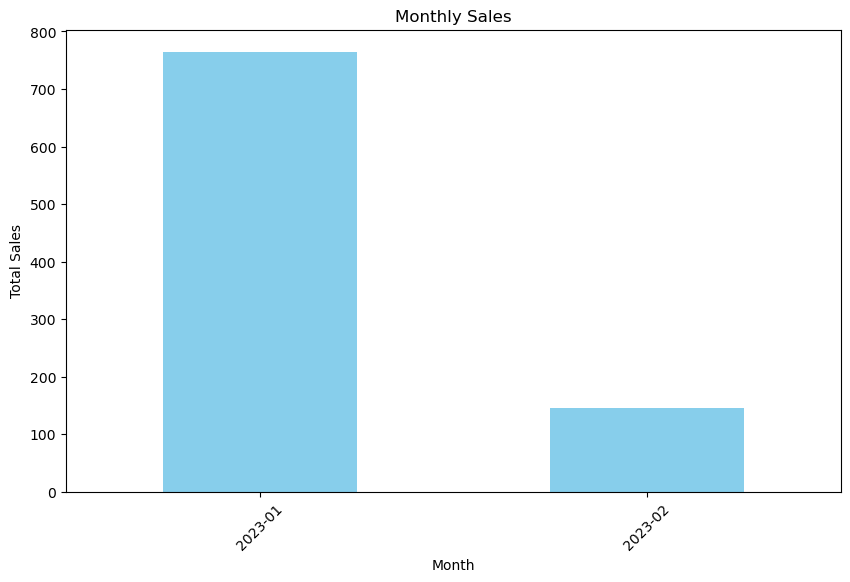

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data(file_path):
    """Load sales data from a CSV file."""
    try:
        data = pd.read_csv(file_path)
        print("Data loaded successfully!")
        return data
    except Exception as e:
        print("Error loading data:", e)
        return None

def clean_data(data):
    """Clean and preprocess the data."""
    print("\nCleaning Data...")
    # Fill Missing Values
    data['Product_Category'] = data['Product_Category'].fillna("Unknown")
    data = data.dropna()

    # Convert Columns
    data['Date'] = pd.to_datetime(data['Date'])
    data['Sales_Amount'] = pd.to_numeric(data['Sales_Amount'], errors='coerce')
    
    # Add New Columns
    data['Year_Month'] = data['Date'].dt.to_period('M')
    if 'Quantity' in data.columns and 'Price' in data.columns:
        data['Revenue'] = data['Quantity'] * data['Price']
    
    print("Data cleaned successfully!")
    return data

def analyze_data(data):
    """Analyze and display insights from the data."""
    print("\n--- Sales Insights ---")
    
    # Total Sales by Month
    monthly_sales = data.groupby('Year_Month')['Sales_Amount'].sum()
    print("\nMonthly Sales:")
    print(monthly_sales)

    # Top 5 Products by Revenue
    if 'Revenue' in data.columns:
        top_products = data.groupby('Product_Name')['Revenue'].sum().sort_values(ascending=False).head(5)
        print("\nTop 5 Products by Revenue:")
        print(top_products)
    
    # Visualize Monthly Sales
    monthly_sales.plot(kind='bar', figsize=(10, 6), color='skyblue')
    plt.title("Monthly Sales")
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.xticks(rotation=45)
    plt.show()

def main():
    print("Welcome to the Sales Report Analyzer!")
    
    # Load Data
    file_path = input("Enter the path to your sales CSV file: ")
    data = load_data(file_path)
    if data is None:
        return
    
    # Clean Data
    data = clean_data(data)
    
    # Analyze Data
    analyze_data(data)

if __name__ == "__main__":
    main()